In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('opcode_results/REMOVE.csv')

In [3]:
def plot_target_vs_each_feature(X: pd.DataFrame, y: pd.Series):
    y_vals = y.values.reshape(-1)
    for col in X.columns:
        x_vals = X[col].values
        plt.figure(figsize=(8, 5))
        plt.scatter(x_vals, y_vals)
        plt.xlabel(col)
        plt.ylabel("ns")
        plt.title(f"ns vs {col}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [5]:
def myfunc_w(X, y, power=1.0):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    X_train_mat = X_train.to_numpy(dtype=float)
    X_test_mat  = X_test.to_numpy(dtype=float)
    ys = y_train.to_numpy(dtype=float)

    max_j = np.max(X_train_mat, axis=0)

    normalized = X_train_mat / max_j
    sum_norm = np.sum(normalized, axis=1)

    weights = 1.0 / (sum_norm ** power)

    A = np.hstack([X_train_mat, np.ones((X_train_mat.shape[0], 1))])

    W = weights[:, None]
    A_w = W * A
    y_w = W.ravel() * ys

    beta, *_ = np.linalg.lstsq(A_w, y_w, rcond=None)

    A_test = np.hstack([X_test_mat, np.ones((X_test_mat.shape[0], 1))])
    y_pred = A_test @ beta

    r2 = float(r2_score(y_test.to_numpy(dtype=float), y_pred))

    return beta, r2

In [ ]:
X = df[["arrrefs", "itemrefs", "itemnumber"]]
y = df["ns"]
plot_target_vs_each_feature(X, y)

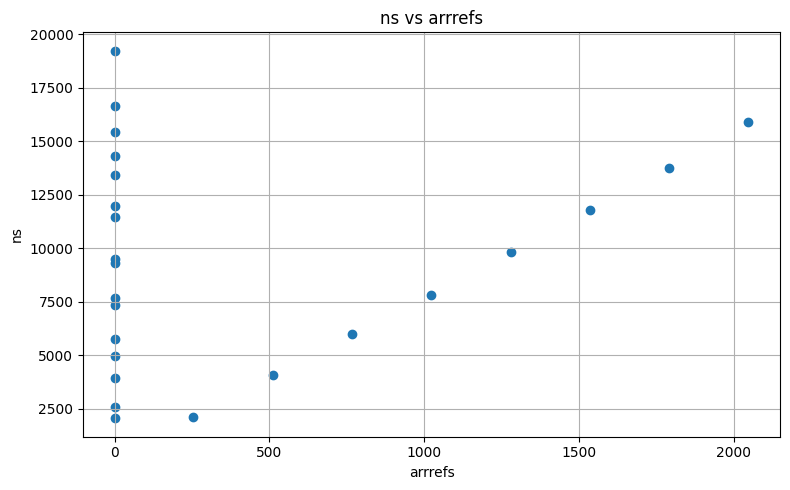

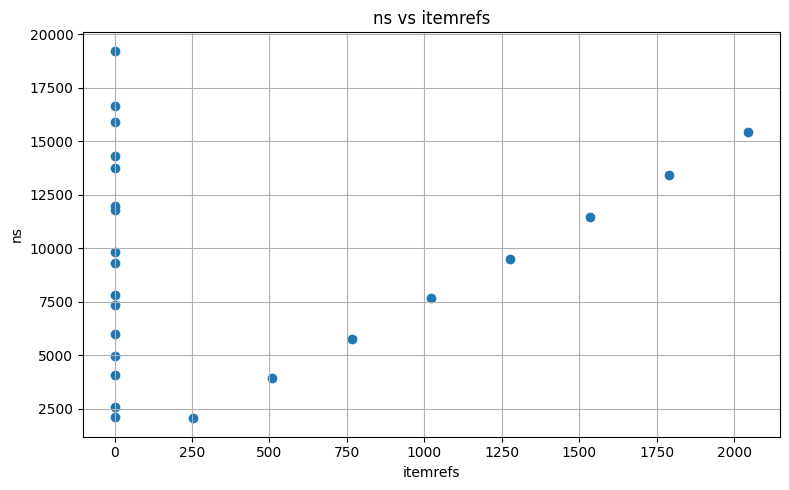

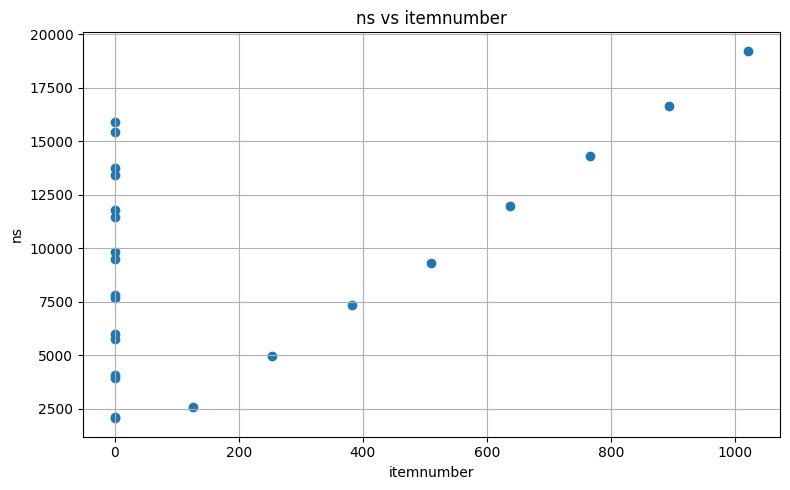

[ 7.71219314  7.50630147 18.67424943 -7.57699564]
0.9979117920974755


In [6]:
beta, r2 = myfunc(df, ["arrrefs", "itemrefs", "itemnumber"])
print(beta)
print(r2)